Content

Digunakan untuk mempelajari Suara Pria dan Wanita dengan menggunakan Algoritma Regresi Logistik

In [5]:
import os 
os.getcwd()

'/content'

In [6]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud

# Any results you write to the current directory are saved as output

In [13]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/voice.csv") #read to file

Silahkan lihat di bawah ini

Kolom label sangat penting bagi kami. Pada grafik di bawah ini kami menunjukkan bahwa tidak ada data NaN (data yang hilang)

CATATAN: Tidak ada white band karena tidak ada nilai NaN

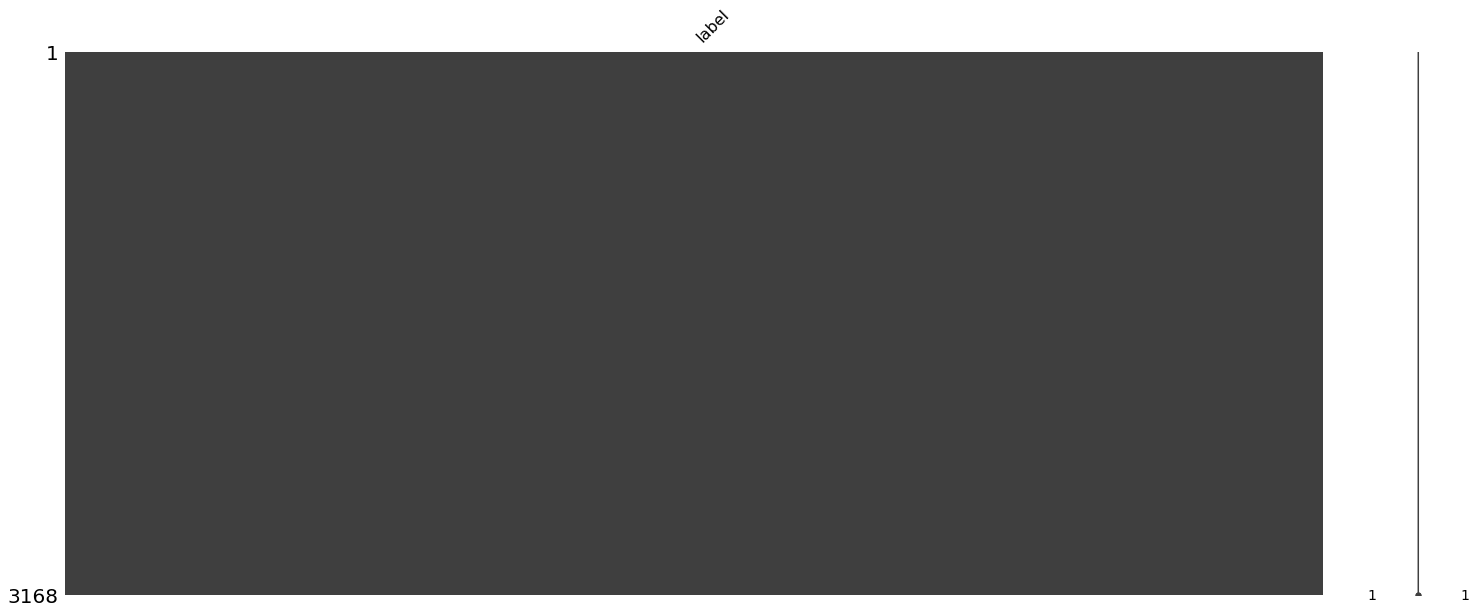

In [15]:
newDataframe = dataframe.loc[:,["label"]]
import missingno as msno
msno.matrix(newDataframe)
plt.show()

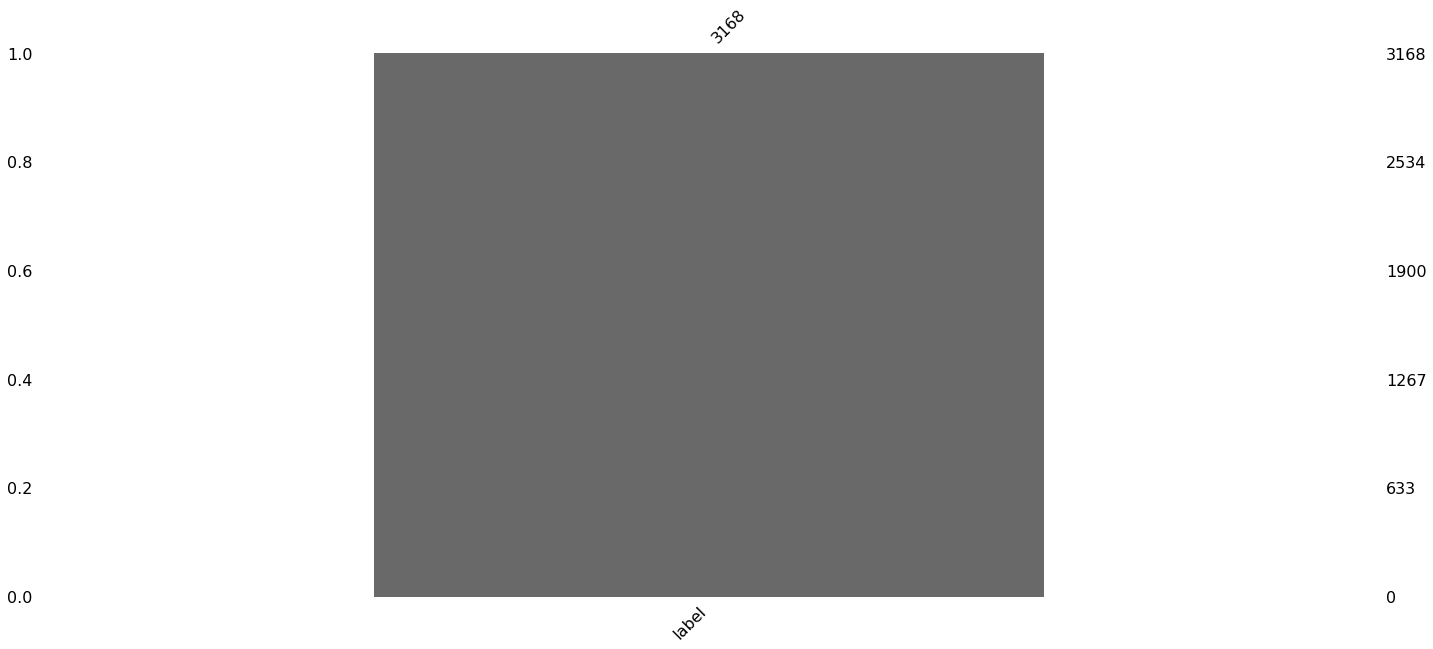

In [16]:
msno.bar(newDataframe)
plt.show()

Silahkan lihat di bawah ini

10 data pertama dalam kumpulan data

In [17]:
dataframe.head() #TOP10 data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Silahkan lihat di bawah ini

Algoritme Regresi Logistik mengembalikan data untuk nilai 0 atau 1. Kesimpulan Kami ingin Anda kembali sebagai pria atau wanita. Untuk alasan ini dataframe.label = [1 if (each == 'male') else 0 untuk masing-masing di dataframe.label] baris kode diubah menjadi Pria 0 Wanita 1.

In [19]:
dataframe.label = [1 if(each == 'male') else 0 for each in dataframe.label] #1:Male 0: Female
y = dataframe.label.values
x_data = dataframe.drop(["label"],axis=1) 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values #Normalization

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
x_test  = x_test.T
y_train = y_train.T
y_test  = y_test.T

Silahkan lihat di bawah ini

* init_weights_bias adalah tempat nilai awal bobot dan nilai prima ditetapkan. * Nilai 0.01 dan 0.0 adalah pokok bahasan deep learning. Untuk saat ini, senang mengetahui nilai-nilai ini secara default

In [21]:
def init_weights_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

Silahkan lihat di bawah ini

Fungsi forward_backward_propagation dapat dijelaskan dengan algoritma regresi logis

In [22]:
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]    
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

Silahkan lihat di bawah ini

Fungsi update membantu Anda memperbarui nilai bobot dan bias. Kami memperbarui nilai ini untuk memprediksi nilai pengujian dengan benar

In [23]:
def update_weights_bias(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Silahkan lihat di bawah ini

Fungsi update memungkinkan kita untuk membuat model kita (parameter w dan b adalah model kita di sini)

In [24]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.736190
Cost after iteration 10: 0.014458
Cost after iteration 20: 0.008170
Cost after iteration 30: 0.005726
Cost after iteration 40: 0.004419
Cost after iteration 50: 0.003604
Cost after iteration 60: 0.003045
Cost after iteration 70: 0.002639
Cost after iteration 80: 0.002329
Cost after iteration 90: 0.002085
Cost after iteration 100: 0.001888
Cost after iteration 110: 0.001726
Cost after iteration 120: 0.001590
Cost after iteration 130: 0.001474
Cost after iteration 140: 0.001374
Cost after iteration 150: 0.001286
Cost after iteration 160: 0.001210
Cost after iteration 170: 0.001142
Cost after iteration 180: 0.001081
Cost after iteration 190: 0.001027
Cost after iteration 200: 0.000978
Cost after iteration 210: 0.000934
Cost after iteration 220: 0.000893
Cost after iteration 230: 0.000856
Cost after iteration 240: 0.000822
Cost after iteration 250: 0.000790
Cost after iteration 260: 0.000761
Cost after iteration 270: 0.000734
Cost after iteration 280: 0.000

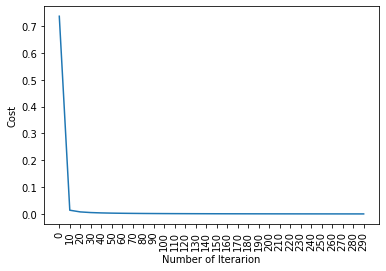

test accuracy: 100.0 %


In [25]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = init_weights_bias(dimension)

    parameters,gradients,cost_list = update_weights_bias(w,b,x_train,y_train,learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return y_prediction_test #Estimates for Complex Matrix
    
y_predict = logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=300)

Silahkan lihat di bawah ini

Nilai y_predict berjenis float. Kami mengubah nilai-nilai ini menjadi.

In [27]:
predict = []
for i in range(0,1):
    for each in y_predict[i]:
        predict.append(int(each))

Silahkan lihat di bawah ini

Kode berikut memiliki 616 tebakan benar dan 18 tebakan salah

Daftar nilai perkiraan tersedia di bawah (Predict :) Daftar nilai aktual tersedia di bawah (y_test :)

In [28]:
truePredict = 0
falsePredict = 0
for p in range(len(predict)):
    for y in range(p,len(y_test)):
        if (predict[p] == y_test[y]):
            truePredict = truePredict +1
            break
        else:
            falsePredict = falsePredict +1
            break
print("True Predict: ",truePredict)
print("False Predict",falsePredict)
print("-------------------------------------------------------------------------------------")
print("Predict: ",predict)
print("-------------------------------------------------------------------------------------")
print("y_test: ",y_test)

True Predict:  634
False Predict 0
-------------------------------------------------------------------------------------
Predict:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

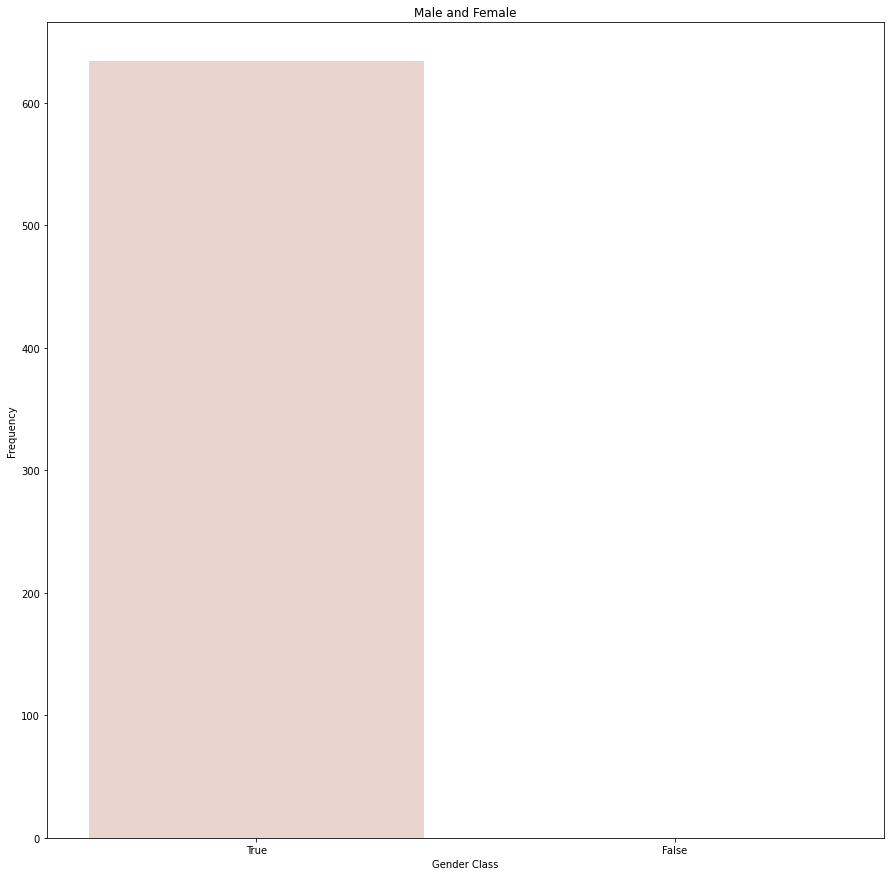

In [29]:
x_Axis = ["True","False"]
y_Axis = [truePredict,falsePredict]

plt.figure(figsize=(15,15))
sns.barplot(x=x_Axis,y=y_Axis,palette = sns.cubehelix_palette(len(x_Axis)))
plt.xlabel("Gender Class")
plt.ylabel("Frequency")
plt.title("Male and Female")
plt.show()

Silahkan lihat di bawah ini

Catatan tentang Confusion Matrix

Ini menentukan nilai mana yang salah diestimasi dan nilai mana yang diestimasi dengan benar. Matriks kompleksitas digunakan untuk menunjukkan kepada kita apa perkiraan kita

CATATAN: Kode di atas adalah contoh matriks konfusi tanpa menggunakan pustaka sklearn.

CATATAN: Nomor 1: Pria, Nomor 0: Wanita

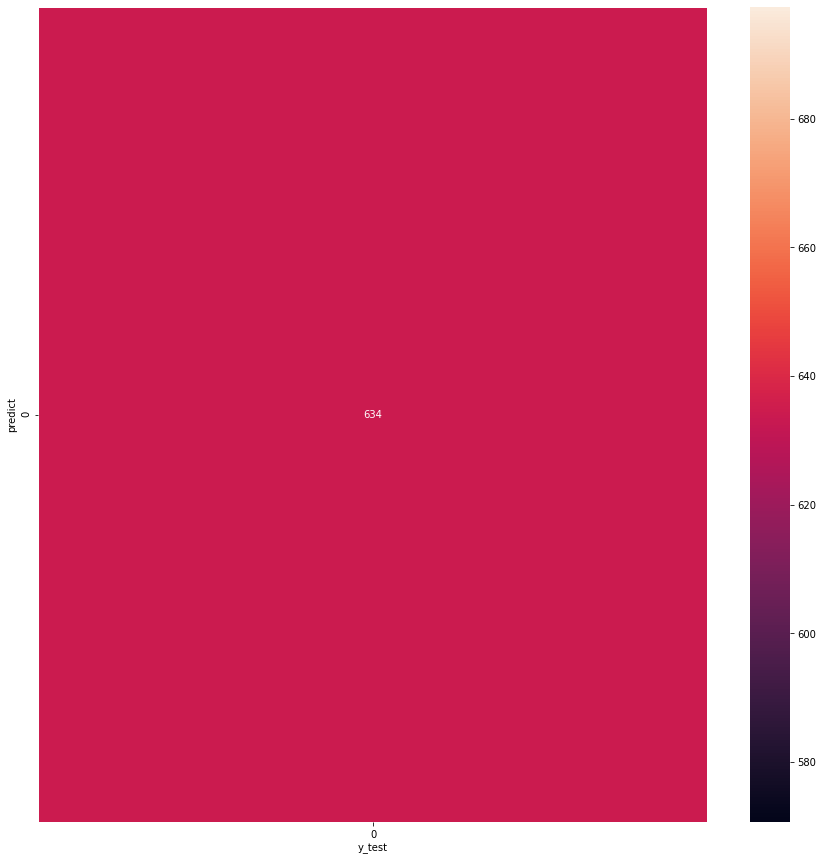

In [30]:
conf_matrix = confusion_matrix(y_test,predict)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_matrix,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_test")
plt.ylabel("predict")
plt.show()

Catatan Tentang Regresi Logistik

Dalam fungsi logistic_regressi, learning_rate dan jumlah_iterasi sangat penting

learning_rate adalah jumlah lompatan dalam penghitungan kemiringan kami. Itu tidak boleh terlalu besar atau terlalu kecil. Jika penyebabnya terlalu besar, nilai biaya minimum tidak akan pernah dapat ditemukan. Jika terlalu kecil, ia bergerak sangat lambat. Dalam fungsi di atas kami telah memilih 1

Parameter num_iteration memungkinkan Anda untuk menentukan jumlah pengulangan. Saat nilai parameter meningkat, bidang pembelajaran diperbarui lagi

Ketika learning_rate = 1 dan num_iterations = 100 dipilih, validitas tes adalah 92.74447949526814% ketika learning_rate = 1 dan jumlah_iterations = 300 dipilih, dan validitas tes 97.1608832807571%. *

CATATAN: Kami telah memilih Learning_rate = 1, num_iterations = 300 sebagai nilai default. Akurasi pengujian adalah 97.1608832807571 Namun, seperti yang telah kami jelaskan di atas, saat kita meningkatkan parameter num_iteration, akurasi pengujian juga akan meningkat.